## KNN

[Source](https://www.youtube.com/watch?v=SDSC4yLLBKM&list=PLfdYKAN5q9QMO9WkKS67AveqwpcCPFvzc&index=5)

<p>kNN stands for k Nearest Neighbors
<p>It is a <b>supervised</b> learning algorithm 
But in essence supervised simply means that we require labelled data

It can solve both classification and regression problems.


In [1]:
#sklearn is a machine learning library in python
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier,KNeighborsRegressor

<h2>How does kNN work?</h2>
<p>A number of neighbors k is chosen e.g. 10</p>
<p>Then for each data point p, the 10 data points whose input variables (X) are most <b>similar</b> to p (based on some distance similarity metric) are selected</p>
<p>Then the <b>average</b> output variable of these 10 points are found and used as the predicted output value for p</p>
<p>If this is a <b>classification</b> task then the averaging might be majority voting</p>
<p>For a <b>regression</b> task it could be simply getting the mean of the 10 outputs</p>
<p>The averaging can also include <b>weighting</b> by distance from p so closer points have more of a contribution in the final value</p>

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris_data=load_iris()

In [7]:
iris_data.data.shape

(150, 4)

It has 4 features and 150 instances

In [8]:
iris_data.target.shape # the class label

(150,)

<h2>Underfitting and Overfitting</h2>
<p><b>Underfitting</b> occurs when there isn't enough data to learn the underlying features and make accurate predictions</p>
<p><b>Overfitting</b> occurs when the model fits the training data too well and does not work well for unseen data</p>

<h3>Solution: Validation</h3>
<p>The data is split into training and testing -- e.g. the model is trained on 80%, and tested on 20%</p>
<p>Or even better, training, validation and testing -- e.g. the model is trained on 60%, adjusted on 20% and tested on 20%</p>
<h4>More Advanced: Cross-Validation</h4>
<p><b>Leave one out: </b>For each data point p, use p as testing, and the rest as training. Average.</p>
<p><b>k-Fold Cross Validation: </b>Split the data into k folds, for k runs, use one fold as testing and the rest as training. Average over the k folds. (We will use this one)</p>

In [9]:
from sklearn.model_selection import cross_val_predict

In [10]:
X=iris_data.data
y=iris_data.target
knn = KNeighborsClassifier(n_neighbors=10)
y_pred = cross_val_predict(knn,X,y, cv=5)

In [51]:
import numpy as np

In [52]:
np.unique(y_pred)

array([0, 1, 2])

3 class values

In [11]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

<h2>Evaluation</h2>
<p><b>mean Squared Error: </b>averaged of the squared error of the difference between the actual and predicted values (lower = better)
<p><b>R2: </b>the correlation between the dependent variable and the set of independent variables (higher = better)

In [12]:
from sklearn.metrics import mean_squared_error,r2_score

In [13]:
print(mean_squared_error(y,y_pred))
print(r2_score(y,y_pred))

0.02
0.97


<h2>What value for k?</h2>
<p>Test a range of values and see which produces the lowest error</p>

In [17]:
import pandas as pd

In [40]:
error =[]
rq=[]
for k in range(1,51):
    knn=KNeighborsClassifier(n_neighbors=k)
    y_pred = cross_val_predict(knn,X,y,cv=5)
    error.append(mean_squared_error(y,y_pred))
    rq.append(r2_score(y,y_pred))

In [15]:
import matplotlib.pyplot as plt

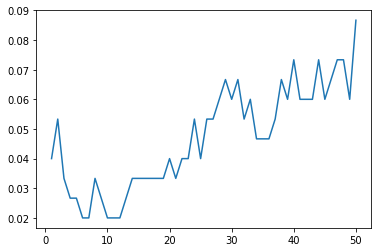

In [41]:
plt.plot(range(1,51),error)

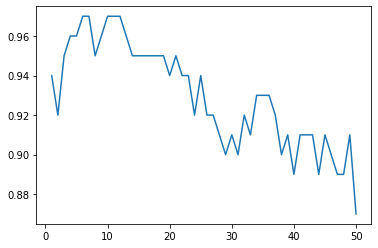

In [42]:
plt.plot(range(1,51),rq)

using k=10, will increase  R2 and yield lower Mean Squared Error.

Using Boston dataset

In [43]:
from sklearn.datasets import load_boston

In [44]:
boston_data=load_boston()

In [45]:
boston_data.data.shape

(506, 13)

In [47]:
boston_data.target.shape

(506,)

In [57]:
X=boston_data.data
y=boston_data.target
np.unique(y)

array([ 5. ,  5.6,  6.3,  7. ,  7.2,  7.4,  7.5,  8.1,  8.3,  8.4,  8.5,
        8.7,  8.8,  9.5,  9.6,  9.7, 10.2, 10.4, 10.5, 10.8, 10.9, 11. ,
       11.3, 11.5, 11.7, 11.8, 11.9, 12. , 12.1, 12.3, 12.5, 12.6, 12.7,
       12.8, 13. , 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.8, 13.9, 14. ,
       14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.8, 14.9, 15. , 15.1, 15.2,
       15.3, 15.4, 15.6, 15.7, 16. , 16.1, 16.2, 16.3, 16.4, 16.5, 16.6,
       16.7, 16.8, 17. , 17.1, 17.2, 17.3, 17.4, 17.5, 17.6, 17.7, 17.8,
       17.9, 18. , 18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.7, 18.8, 18.9,
       19. , 19.1, 19.2, 19.3, 19.4, 19.5, 19.6, 19.7, 19.8, 19.9, 20. ,
       20.1, 20.2, 20.3, 20.4, 20.5, 20.6, 20.7, 20.8, 20.9, 21. , 21.1,
       21.2, 21.4, 21.5, 21.6, 21.7, 21.8, 21.9, 22. , 22.1, 22.2, 22.3,
       22.4, 22.5, 22.6, 22.7, 22.8, 22.9, 23. , 23.1, 23.2, 23.3, 23.4,
       23.5, 23.6, 23.7, 23.8, 23.9, 24. , 24.1, 24.2, 24.3, 24.4, 24.5,
       24.6, 24.7, 24.8, 25. , 25.1, 25.2, 25.3, 26

In [58]:
knn = KNeighborsRegressor(n_neighbors=10)
y_pred = cross_val_predict(knn, X, y, cv=5)
y_pred

array([24.  , 26.17, 21.95, 23.09, 21.99, 21.95, 23.72, 22.32, 23.54,
       27.12, 24.93, 22.62, 23.56, 22.63, 31.44, 23.75, 27.76, 27.38,
       25.43, 24.88, 27.33, 22.32, 22.32, 24.54, 22.32, 29.31, 31.44,
       29.31, 26.45, 31.44, 31.52, 28.19, 20.09, 34.18, 20.09, 21.17,
       23.19, 23.67, 24.47, 35.55, 33.77, 23.99, 23.99, 23.99, 21.66,
       21.65, 21.65, 30.28, 25.19, 21.95, 30.77, 31.98, 30.06, 30.06,
       31.11, 39.74, 25.23, 37.2 , 25.35, 25.61, 28.85, 36.17, 29.06,
       25.96, 28.66, 26.8 , 26.38, 27.11, 26.43, 26.43, 28.47, 28.32,
       30.27, 28.09, 25.67, 20.11, 28.54, 20.11, 20.11, 20.36, 26.85,
       32.41, 26.89, 26.01, 22.82, 25.55, 22.88, 22.79, 21.5 , 21.88,
       21.35, 21.68, 31.67, 31.17, 37.68, 25.85, 21.91, 21.81, 24.1 ,
       22.14, 19.22, 19.68, 13.62, 21.05, 21.05, 21.05, 21.05, 21.05,
       21.05, 21.05, 21.29, 20.52, 20.52, 20.52, 20.52, 19.2 , 19.34,
       20.52, 19.74, 19.6 , 28.03, 28.82, 23.98, 23.98, 25.38, 25.66,
       26.64, 20.52,

In [59]:
from math import sqrt

In [60]:
print(sqrt(mean_squared_error(y,y_pred)))# actual, predicted
print(r2_score(y,y_pred))

8.605464138759643
0.12278604134701132


In [61]:
error = []
for k in range(1,51):
    knn = KNeighborsRegressor(n_neighbors=k)
    y_pred = cross_val_predict(knn, X, y, cv=5)
    error.append(mean_squared_error(y,y_pred))

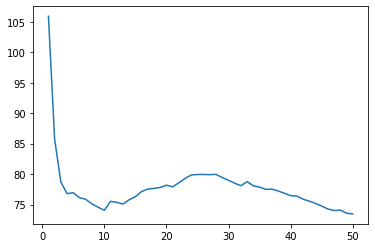

In [62]:
plt.plot(range(1,51),error)

<h2>Scaling</h2>
<p>With numeric variables, scaling can help to reduce outliers.
    <p>A standard scaler, transforms variables into a value related to the min, max of the variable</p>
    <p>Scaling must be done on the training data, and then applied to the testing, so we need to add this to our classifier pipeline</p>

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [64]:
classifier_pipeline = make_pipeline(StandardScaler(),KNeighborsRegressor(n_neighbors=10))

In [65]:
y_pred = cross_val_predict(classifier_pipeline, X, y, cv=5)
print(sqrt(mean_squared_error(y,y_pred)))
print(r2_score(y,y_pred))

5.492547106344652
0.6426411712043607


In [66]:
error = []
for k in range(1,51):
    classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=k))
    y_pred = cross_val_predict(classifier_pipeline, X, y, cv=5)
    error.append(mean_squared_error(y, y_pred))

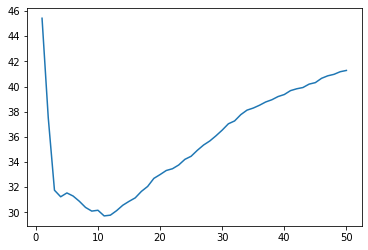

In [67]:
plt.plot(range(1,51),error)

<h3>Comparing Models</h3>
<p>It's important when you compare models that you are comparing on the same data.
    <p>When the data is split into training and testing using cross-validation, you need to split the same way every time if you want to really compare trials</p>

In [68]:
from sklearn.model_selection import KFold

In [75]:
cv = KFold(n_splits=5, random_state=0, shuffle=True)

In [76]:
classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=10))
y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
print(sqrt(mean_squared_error(y,y_pred)))
print(r2_score(y,y_pred))

4.765172294476605
0.7310236154992027


<h3>Which is better? kNN or a simple linear regression model?</h3>
<p>Looking at the difference in RMSE and R2 we might assume that the knn performs significantly better than the Linear Model, however a two-sample t-test shows that they are not significantly different.

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
classifier_pipeline = make_pipeline(StandardScaler(), LinearRegression())
y_pred2 = cross_val_predict(classifier_pipeline, X, y, cv=cv)
print(sqrt(mean_squared_error(y,y_pred2)))
print(r2_score(y,y_pred2))

4.883312536986396
0.7175211240180528


In [79]:
diff_knn = [abs(round(y[i]-y_pred[i],2)) for i in range(0,len(y))]
diff_linear = [abs(round(y[i]-y_pred2[i],2)) for i in range(0,len(y))]

In [80]:
from scipy.stats import ttest_ind
ttest_ind(diff_knn,diff_linear)

Ttest_indResult(statistic=-1.6210821549130077, pvalue=0.10531214470988091)

<h3>Feature Selection</h3>
<p>Sometimes not all input variables are good predictor of the output variables. Sometimes, some of them can actually decrease the accuracy of the model.</p>
<p>Feature Selection allows you to try out the model with different subsets of input variables to determine which are the best predictors</p>

<h3>Evaluation</h3>
<p>Looking at the mean squared error, and r2 score alone, often we can think we have a great model when in actual fact there are some underlying problems.
<p>That is why it is always imporant to look at the <b>residuals</b>